In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
import sqlite3
from sqlite3 import Error

In [2]:
# Importing Players.csv and Seasons_Stats.csv
Players_file = pd.read_csv('Players.csv',sep=',',header=0)
Players = Players_file.values

Stats_file = pd.read_csv('Seasons_Stats.csv',sep=',',header=0)
Stats = Stats_file.values

In [3]:
# Importing MVP_Winners.csv and reformatting to match earlier files
Winners_file = pd.read_csv('MVP_Winners.csv',sep=',',header=1) #dont have data for 2017-18
Winners = Winners_file.values

for i in range(len(Winners[:,0])):
    Winners[i,0] = int(Winners[i,0][:2]+Winners[i,0][5:7])
    Winners[i,1] = Winners[i,1].split('\\')[0]
Winners[17,0] = 2000

In [4]:
# Make new arrays for MVPs, index of MVPs, and nonMVPs
MVPs = np.ndarray( (len(Winners[:,0]) , len(Stats[0,:])) , dtype='object')
MVP_index = []
nonMVPs = np.ndarray( (len(Stats[:,0])-len(Winners[:,0]) , len(Stats[0,:])) , dtype='object')
for i in range(len(Stats[:,1])):
    for j in range(len(Winners[:,0])):
        if Winners[j,0] == Stats[i,1]:
            if Winners[j,1] == Stats[i,2].strip('*'):
                MVP_index.append(i)
                MVPs[j,:] = Stats[i,:]
                     
j = 0
for i in range(len(MVP_index)):
    if i in MVP_index:
        j+=1
        nonMVPs[j,:] = Stats[i,:]

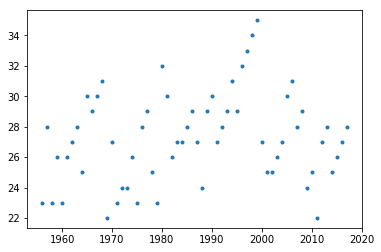

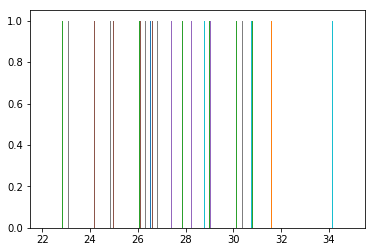

In [5]:
plt.plot(MVPs[:,1],MVPs[:,4],'.')
plt.show()
plt.hist(MVPs[:,4])
plt.show()

In [6]:
# Connecting to SQL database
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        conn.close()
dbfile = "C:/Users/lrabin/Documents/COMP 562/Project/project_data.db"
create_connection(dbfile)

2.6.0


In [7]:
# Creating Players table
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

cur.execute("""DROP TABLE IF EXISTS Players""")
cur.execute("""CREATE TABLE Players (pid, Player, height, weight, college, born, birth_city, birth_state)""")

with open('Players.csv') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i[''],i['Player'],i['height'],i['weight'],i['collage'],i['born'],i['birth_city'],i['birth_state']) for i in dr]

cur.executemany("""INSERT INTO Players VALUES (?, ?, ?, ?, ?, ?, ?, ?)""", to_db)
conn.commit()
conn.close()

In [8]:
# Creating player_data table
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

cur.execute("""DROP TABLE IF EXISTS player_data""")
cur.execute("""CREATE TABLE player_data (name,year_start,year_end,position,height,weight,birth_date,college)""")

with open('player_data.csv') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['name'],i['year_start'],i['year_end'],i['position'],i['height'],i['weight'],i['birth_date'],i['college']) for i in dr]

cur.executemany("""INSERT INTO player_data VALUES (?, ?, ?, ?, ?, ?, ?, ?)""", to_db)
conn.commit()
conn.close()

In [9]:
# Creating MVP table
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

cur.execute("""DROP TABLE IF EXISTS MVPs""")
cur.execute("""CREATE TABLE MVPs (Season, Player)""")

with open('MVP_Winners.csv') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['Season'][:2]+i['Season'][5:7],i['Player'].split('\\')[0]) for i in dr]

cur.executemany("""INSERT INTO MVPs VALUES (?, ?)""", to_db)
conn.commit()
conn.close()

In [10]:
# Creating Team_Wins table
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

cur.execute("""DROP TABLE IF EXISTS Team_Wins""")
cur.execute("""CREATE TABLE Team_Wins (Rk,Season,Lg,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS)""")

with open('Team_Wins.csv') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['Rk'],i['Season'],i['Lg'],i['ATL'],i['BOS'],i['BRK'],i['CHI'],i['CHO'],i['CLE'],i['DAL'],i['DEN'],i['DET'],i['GSW'],i['HOU'],i['IND'],i['LAC'],i['LAL'],i['MEM'],i['MIA'],i['MIL'],i['MIN'],i['NOP'],i['NYK'],i['OKC'],i['ORL'],i['PHI'],i['PHO'],i['POR'],i['SAC'],i['SAS'],i['TOR'],i['UTA'],i['WAS']) for i in dr]

cur.executemany("""INSERT INTO Team_Wins VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""", to_db)
conn.commit()
conn.close()

In [11]:
# Creating Stats table
# % -> p, 3 -> Th, 2 -> Tw, / -> p
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

cur.execute("""DROP TABLE IF EXISTS Stats""")
cur.execute("""CREATE TABLE Stats (sid,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TSp,ThPAr,FTr,ORBp,DRBp,TRBp,ASTp,STLp,BLKp,TOVp,USGp,blanl,OWS,DWS,WS,WSp48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FGp,ThP,ThPA,ThPp,TwP,TwPA,TwPp,eFGp,FT,FTA,FTp,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS)""")

with open('Seasons_Stats.csv') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i[''],i['Year'],i['Player'].split('*')[0],i['Pos'],i['Age'],i['Tm'],i['G'],i['GS'],i['MP'],i['PER'],i['TS%'],i['3PAr'],i['FTr'],i['ORB%'],i['DRB%'],i['TRB%'],i['AST%'],i['STL%'],i['BLK%'],i['TOV%'],i['USG%'],i['blanl'],i['OWS'],i['DWS'],i['WS'],i['WS/48'],i['blank2'],i['OBPM'],i['DBPM'],i['BPM'],i['VORP'],i['FG'],i['FGA'],i['FG%'],i['3P'],i['3PA'],i['3P%'],i['2P'],i['2PA'],i['2P%'],i['eFG%'],i['FT'],i['FTA'],i['FT%'],i['ORB'],i['DRB'],i['TRB'],i['AST'],i['STL'],i['BLK'],i['TOV'],i['PF'],i['PTS']) for i in dr]

cur.executemany("""INSERT INTO Stats VALUES (?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?,?,?, ?,?,?)""", to_db)
conn.commit()
conn.close()

In [12]:
# Testing tables
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

cur.execute("""
            SELECT sid, Year, Player, PTS
            FROM Stats
            WHERE sid = '22800'
            """)
x = cur.fetchmany()
print(x)

conn.commit()
conn.close()

[('22800', '2014', 'Marcus Thornton', '383')]


In [13]:
# Join on MVP winning seasons with Stats
conn = sqlite3.connect(dbfile)
cur = conn.cursor()

cur.execute("""DROP TABLE IF EXISTS MVP_Stats""")
cur.execute("""CREATE TABLE MVP_Stats (Year, Player, PTS)""")
cur.execute("""
            SELECT S.Year, S.Player, S.PTS
            
            FROM MVPs M, Stats S
            WHERE M.Player = S.Player AND M.Season = S.Year
            """)
x = cur.fetchmany(5)
print(x)

conn.commit()
conn.close()

[('2017', 'Russell Westbrook', '2558'), ('2016', 'Stephen Curry', '2375'), ('2015', 'Stephen Curry', '1900'), ('2014', 'Kevin Durant', '2593'), ('2013', 'LeBron James', '2036')]


In [14]:
# Importing Team_Wins.csv
with open('Team_Wins.csv') as file:
    dr = csv.DictReader(file)
    win_data = [[0,i['ATL'],i['BOS'],i['BRK'],i['CHI'],i['CHO'],i['CLE'],
                 i['DAL'],i['DEN'],i['DET'],i['GSW'],i['HOU'],i['IND'],
                 i['LAC'],i['LAL'],i['MEM'],i['MIA'],i['MIL'],i['MIN'],
                 i['NOP'],i['NYK'],i['OKC'],i['ORL'],i['PHI'],i['PHO'],
                 i['POR'],i['SAC'],i['SAS'],i['TOR'],i['UTA'],i['WAS']] for i in dr]
for i in range(len(win_data)):
    win_data[i][0] = 2017-i

In [15]:
# Stats to use for learning:
# Age, Games(/SeasonLength), Games Started(/Games), Minutes Played, TS%, 3PAr,
# FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, Field Goals, FGA, FG%, 3P, 3PA
# 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF,
# PTS, Team Wins, index

# Going to append id to end of each player data

# https://datascience.stackexchange.com/questions/13178/how-to-normalize-data-for-neural-network-and-decision-forest

# This puts all the raw data into a list of tuples (team wins added later)
with open('Seasons_Stats.csv') as file:
    dr = csv.DictReader(file)
    raw_data = [(i['Year'],i['Tm'],i['Age'],i['G'],i['GS'],i['MP'],i['TS%'],i['3PAr'],
                 i['FTr'],i['ORB%'],i['DRB%'],i['TRB%'],i['AST%'],i['STL%'],i['BLK%'],
                 i['TOV%'],i['FG'],i['FGA'],i['FG%'],i['3P'],i['3PA'],i['3P%'],i['2P'],
                 i['2PA'],i['2P%'],i['eFG%'],i['FT'],i['FTA'],i['FT%'],i['ORB'],
                 i['DRB'],i['TRB'],i['AST'],i['STL'],i['BLK'],i['TOV'],i['PF'],i['PTS'],0,i['']) for i in dr]
   
# Loops to fill data into numpy array, and add team wins
for i in range(len(raw_data)):
    if raw_data[i][0] != '' and int(raw_data[i][0]) == 1974:
        start = i
        break

data = np.ndarray((len(raw_data)-start,len(raw_data[0])-2))
Wins_file = pd.read_csv('Team_Wins.csv',sep=',',header=-1)
headers = Wins_file.values[0][3:]

for i in range(len(data)):
    # Teams with name changes
    raw_data[start+i] = list(raw_data[start+i])
    if raw_data[start+i][1] == 'KCO' or raw_data[start+i][1] == 'KCK':
        raw_data[start+i][1] = 'SAC'
    if raw_data[start+i][1] == 'SEA':
        raw_data[start+i][1] = 'OKC'
    if raw_data[start+i][1] == 'BUF' or raw_data[start+i][1] == 'SDC':
        raw_data[start+i][1] = 'LAC'
    if raw_data[start+i][1] == 'CAP' or raw_data[start+i][1] == 'WSB':
        raw_data[start+i][1] = 'WAS'
    if raw_data[start+i][1] == 'NOJ':
        raw_data[start+i][1] = 'UTA'
    if raw_data[start+i][1] == 'NYN' or raw_data[start+i][1] == 'NJN':
        raw_data[start+i][1] = 'BRK'
    if raw_data[start+i][1] == 'CHH' or raw_data[start+i][1] == 'CHA':
        raw_data[start+i][1] = 'CHO'
    if raw_data[start+i][1] == 'VAN':
        raw_data[start+i][1] = 'MEM'
    if raw_data[start+i][1] == 'NOH' or raw_data[start+i][1] == 'NOK':
        raw_data[start+i][1] = 'NOP'
    
    # Just copying over data
    for j in range(2,len(data[0])+2):
        if raw_data[start+i][j] == '':
            data[i][j-2] = 0
        else:
            data[i][j-2] = float(raw_data[start+i][j])
            if (j-2==1 or j-2==2 or j-2==3 or j-2==14 or j-2==15 or
                j-2==17 or j-2==18 or j-2==20 or j-2==21 or j-2==24 or
                j-2==25 or j-2==27 or j-2==28 or j-2==29 or j-2==30 or
                j-2==31 or j-2==32 or j-2==33 or j-2==34 or j-2==35):
                if raw_data[start+i][0] == '1999':
                    data[i][j-2] = data[i][j-2] / 50.
                elif raw_data[start+i][0] == '2012':
                    data[i][j-2] = data[i][j-2] / 66.
                else:
                    data[i][j-2] = data[i][j-2] / 82.
    
    # Adding team wins (set traded players to 0 wins)
    for k in range(len(win_data)):
        if raw_data[start+i][0] != '' and win_data[k][0] == int(raw_data[start+i][0]):
            team = raw_data[start+i][1]
            try:
                team_index = np.where(headers==team)[0][0]
                wins = 0
                if win_data[k][team_index+1] != '':
                    wins = int(win_data[k][team_index+1])
                data[i][-2] = wins
            except:
                data[i][-2] = 0
    if raw_data[start+i][0] == '1999':
        data[i][-2] = data[i][-2] / 50.
        if data[i][-2] == 0:
            data[i][-2] = 0.5
    elif raw_data[start+i][0] == '2012':
        data[i][-2] = data[i][-2] / 66.
        if data[i][-2] == 0:
            data[i][-2] = 0.5
    else:
        data[i][-2] = data[i][-2] / 82.
        if data[i][-2] == 0:
            data[i][-2] = 0.5

In [16]:
# Normalizing data and filtering for minimum minutes (oof this is ugly)
def normalize(data):
    minTime = 5.0
    low_minutes = []
    for i in range(len(data)):
        if data[i][3] < minTime:
            low_minutes.append(i)
    ndata = np.ndarray( ( len(data)-len(low_minutes), len(data[0])))

    j=0
    for i in range(len(data)):
        if i not in low_minutes:
            ndata[j] = data[i]
            j = j+1

    for i in range(len(ndata[0])-1):
        up = max(ndata[:,i])
        lo = min(ndata[:,i])
        ndata[:,i] = (ndata[:,i]-lo)/(up-lo) - 0.5
    return ndata
ndata = normalize(data)

In [17]:
#separting MVPs and adding labels
nind = []
labels = np.zeros(len(ndata))
for i in MVP_index:
    if i > 3625:
        nind.append(i)
ndata_MVP = np.ndarray((len(nind),len(ndata[0])))
for i in range(len(nind)):
    for j in range(len(ndata)):
        if nind[i] == ndata[j][-1]:
            ndata_MVP[i] = ndata[j]
            labels[j] = 1

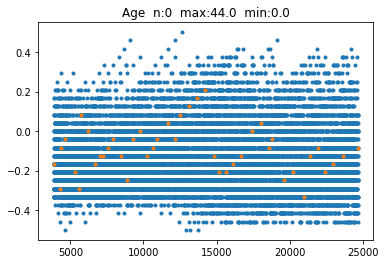

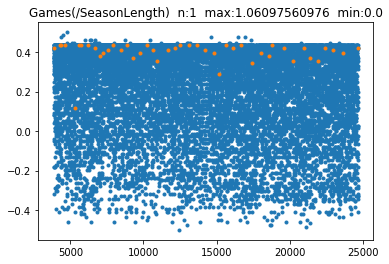

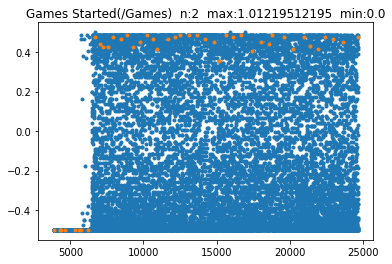

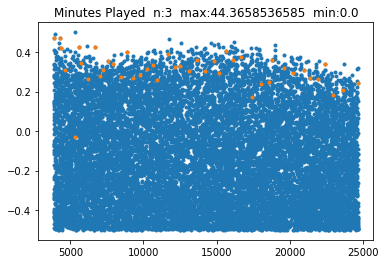

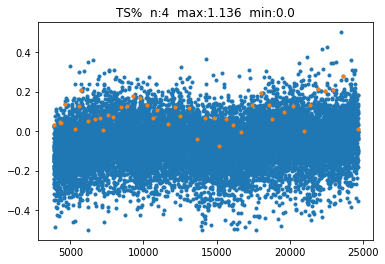

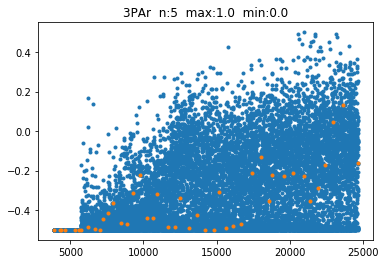

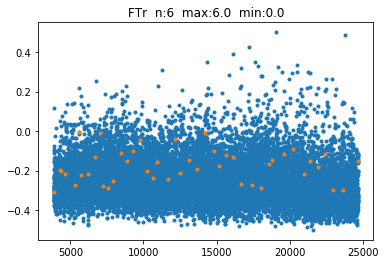

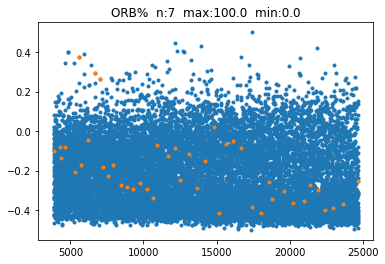

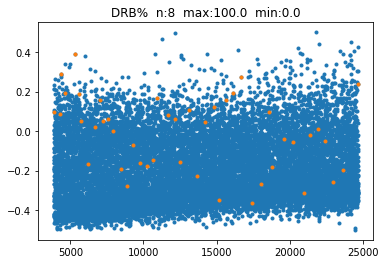

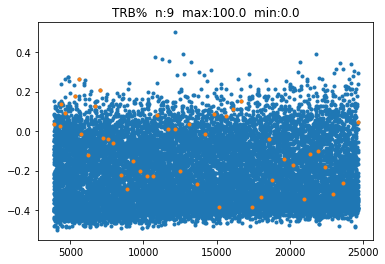

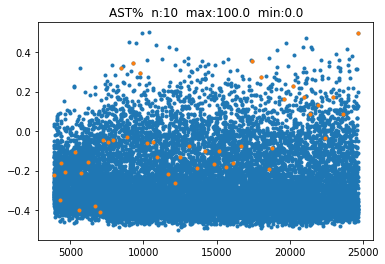

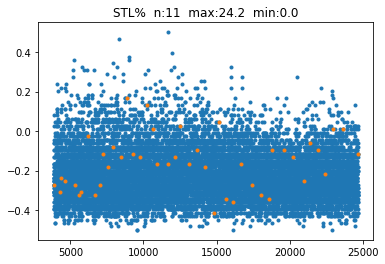

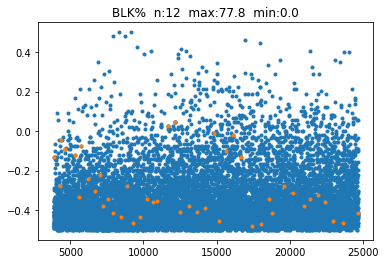

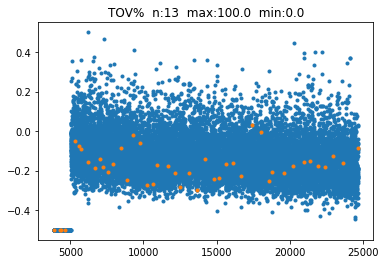

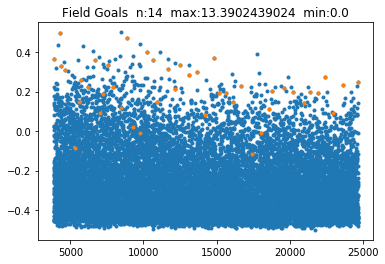

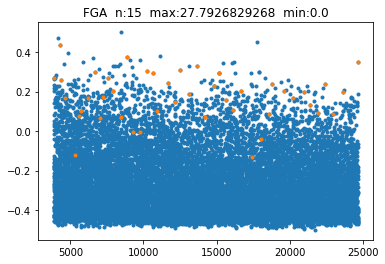

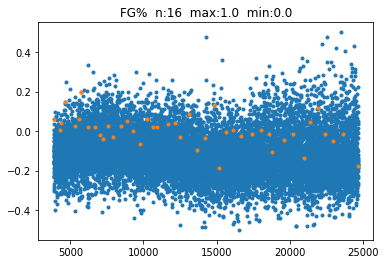

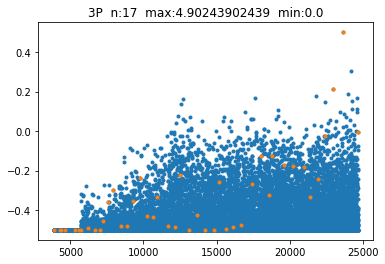

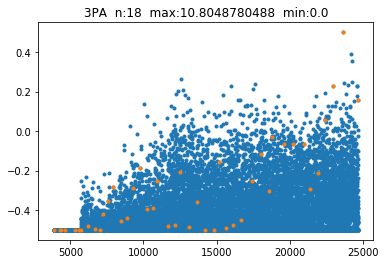

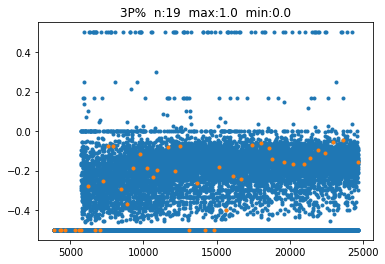

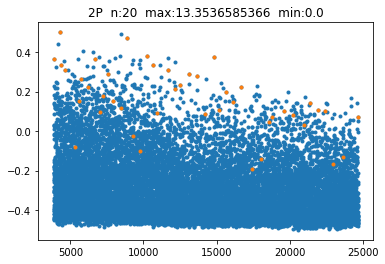

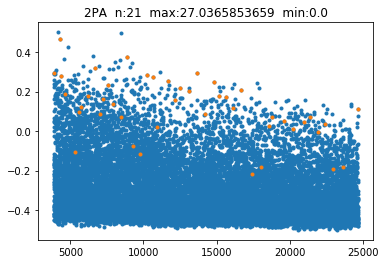

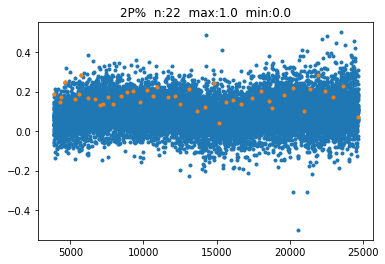

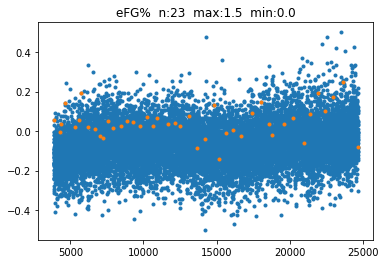

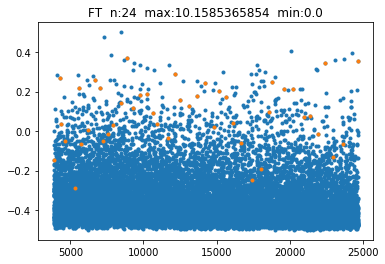

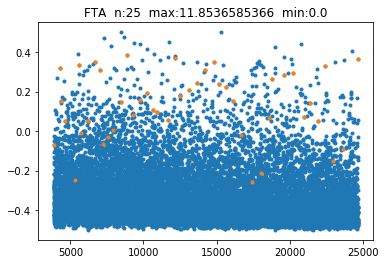

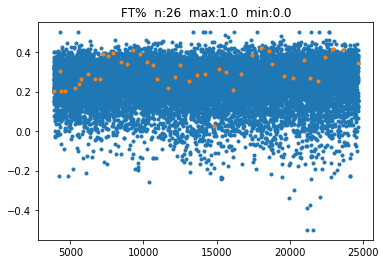

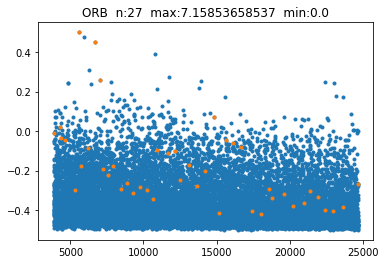

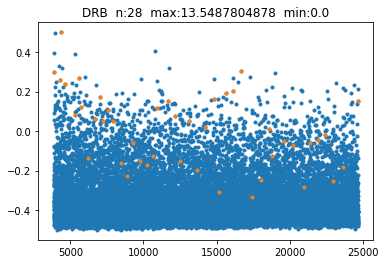

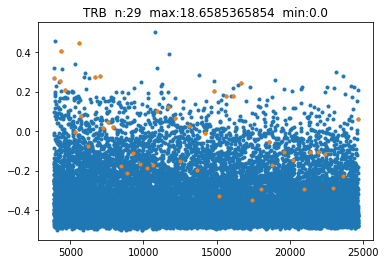

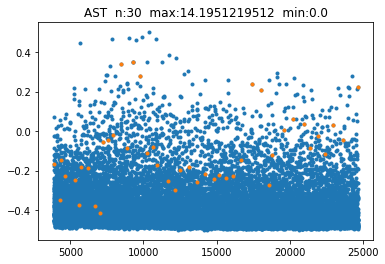

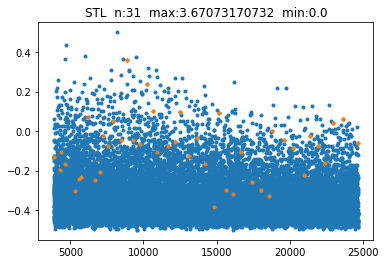

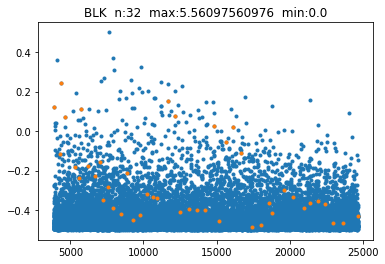

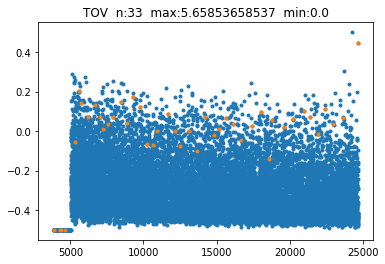

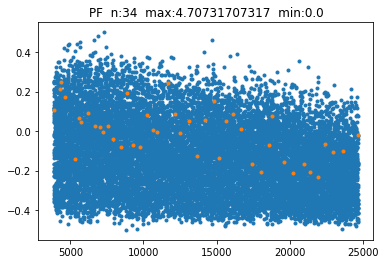

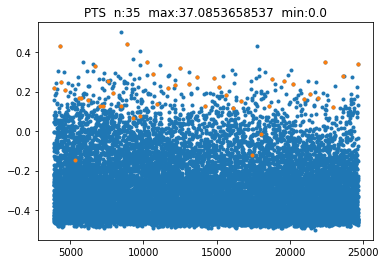

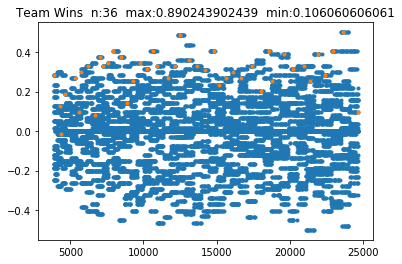

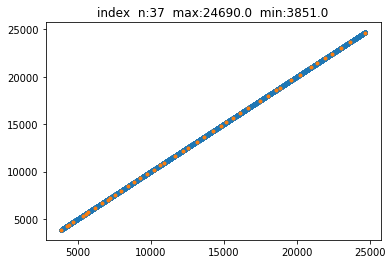

In [18]:
# Plot each column to check for outliers
Labels = [ 'Age', 'Games(/SeasonLength)', 'Games Started(/Games)', 'Minutes Played', 'TS%', '3PAr',
 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Field Goals', 'FGA', 'FG%', '3P', '3PA',
 '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
 'PTS', 'Team Wins', 'index' ]
for i in range(len(ndata[0])):
    up = max(data[:,i])
    lo = min(data[:,i])
    plt.plot(ndata[:,-1],ndata[:,i],'.')
    plt.plot(ndata_MVP[:,-1],ndata_MVP[:,i],'.')
    plt.title(Labels[i]+'  n:'+str(i)+ '  max:'+str(up)+'  min:'+str(lo))
    plt.show()

In [19]:
# Building MVP distance matrix
def dist(a, b):
    s = 0
    for i in range(len(a)):
        s = s + (a[i] - b[i])**2
    return np.sqrt(s)

l = len(ndata_MVP)
dist_MVP = np.ndarray((l,l))
for i in range(l):
    for j in range(l):
        dist_MVP[i][j] = dist(ndata_MVP[i][:-1], ndata_MVP[j][:-1])

In [20]:
# Finding nearest neighbors (ct is how many neighbors)
ct = 3
closest = np.zeros((l,ct)) + 10
close_dist = np.zeros((l,ct)) + 10
for i in range(l):
    for j in range(l):
        if i != j:
            if dist_MVP[i][j] < np.max(close_dist[i]):
                closest[i][np.argmax(close_dist[i])] = j
                close_dist[i][np.argmax(close_dist[i])] = dist_MVP[i][j]

In [21]:
# Let's print each MVPs closest neighbors
for i in range(l):
    mID = int(ndata_MVP[i][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]
    close = []
    for j in range(ct):
        close.append((Stats[int(ndata_MVP[int(closest[i][j])][-1])][2], int(Stats[int(ndata_MVP[int(closest[i][j])][-1])][1])))
    #print(name,year,close,'\n')

In [22]:
# Generate N synthetic MVPs
N = 500
sdata_MVP = np.ndarray((N,len(ndata_MVP[0])))
c1 = np.random.randint(0,l,N)
c2 = np.random.randint(0,ct,N)
for i in range(N):
    data1 = ndata_MVP[c1[i]]
    data2 = ndata_MVP[int(closest[c1[i],c2[i]])]
    sdata_MVP[i][:] = np.random.rand()*(data1-data2) + data2

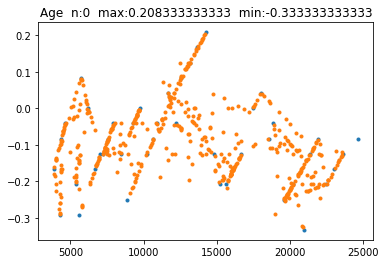

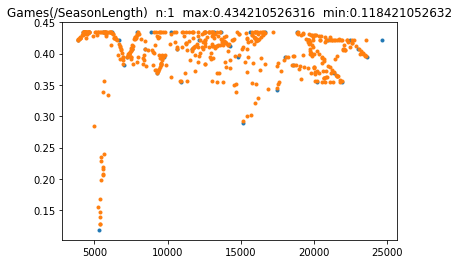

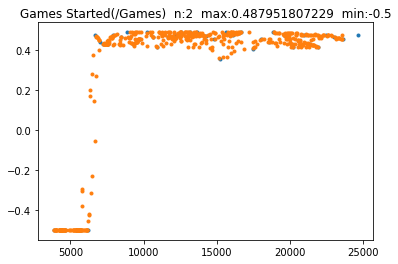

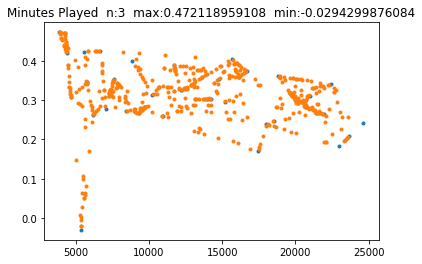

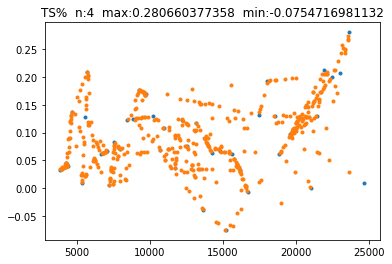

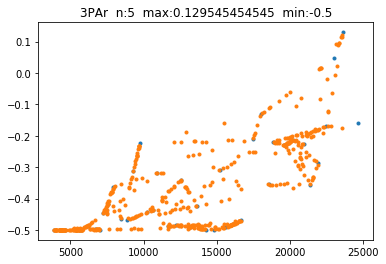

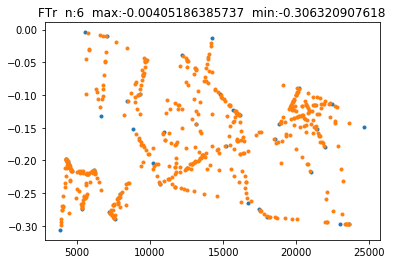

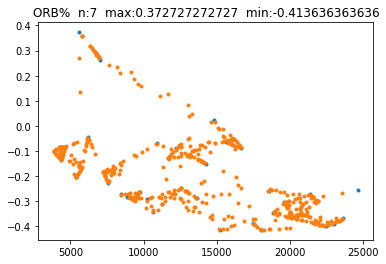

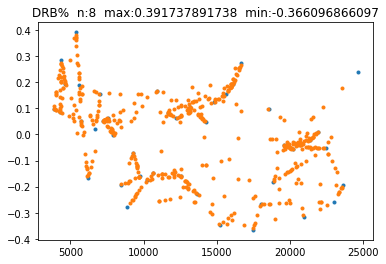

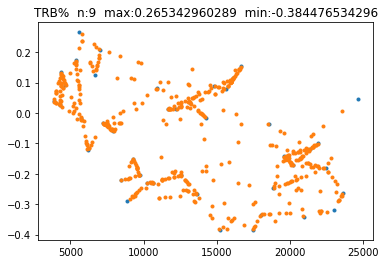

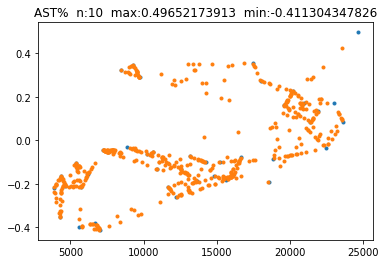

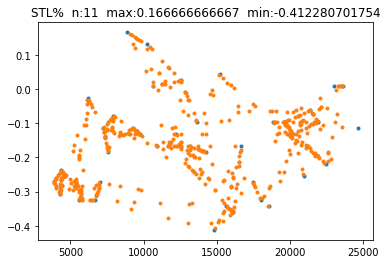

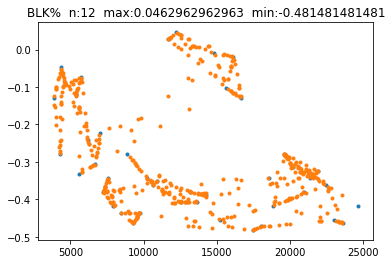

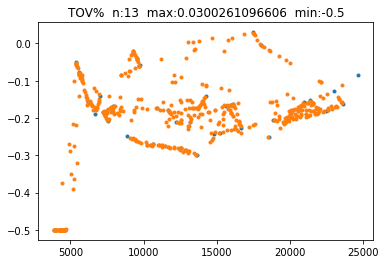

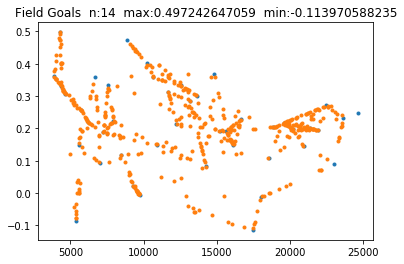

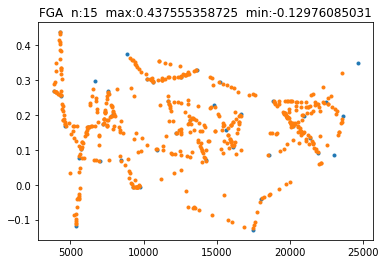

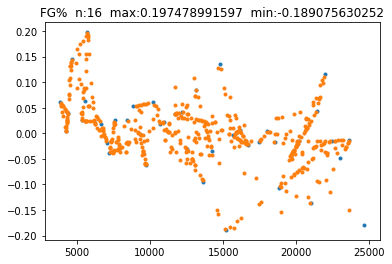

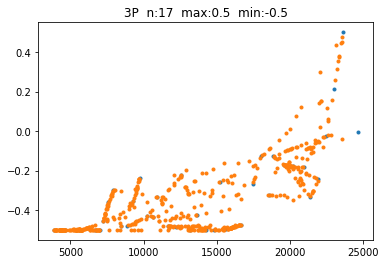

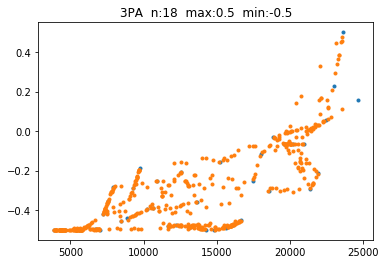

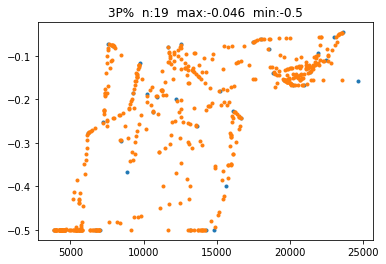

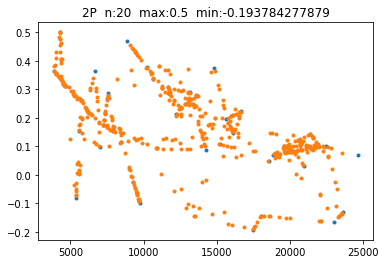

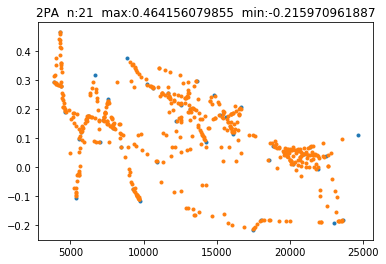

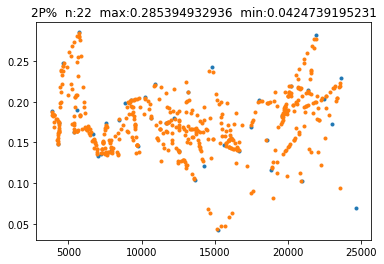

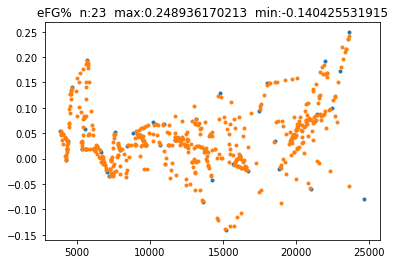

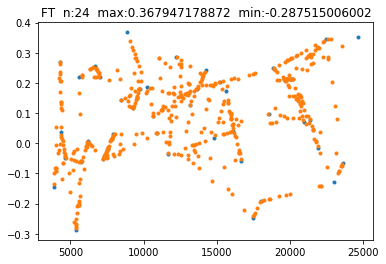

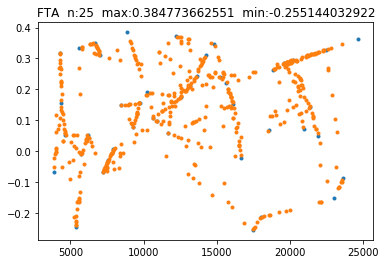

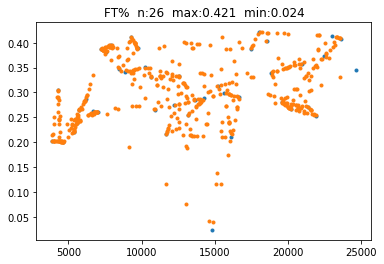

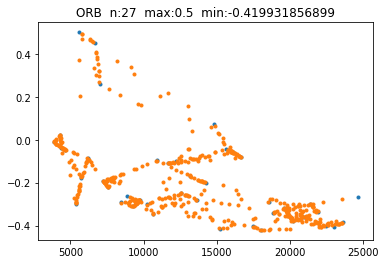

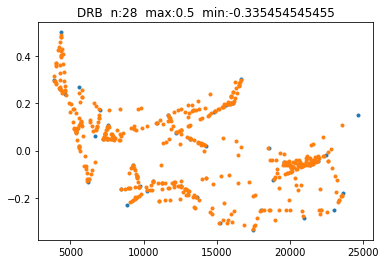

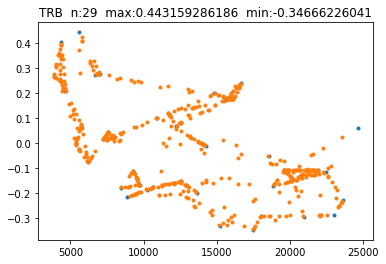

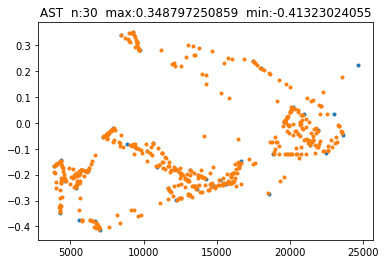

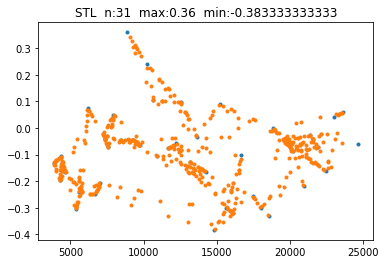

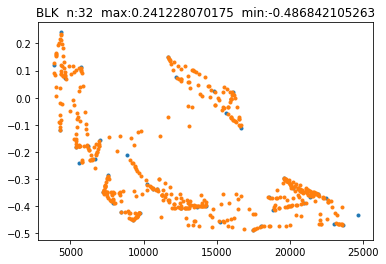

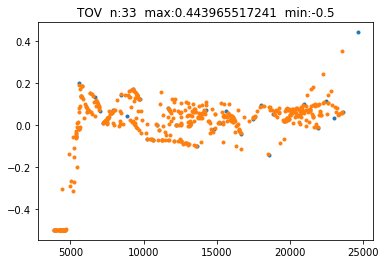

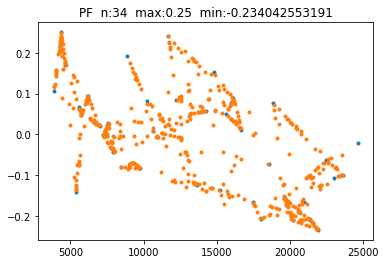

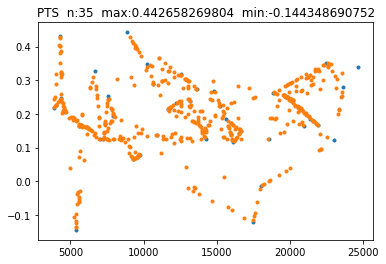

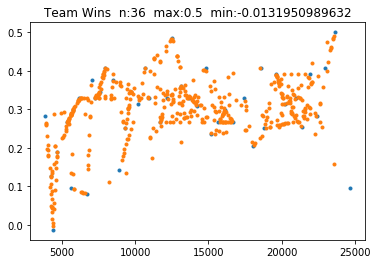

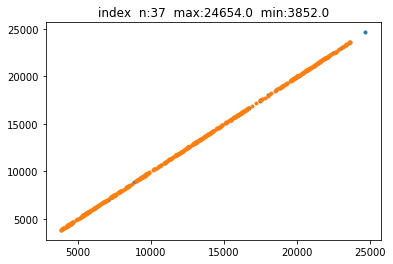

In [23]:
# Plot each column to check for outliers
Labels = [ 'Age', 'Games(/SeasonLength)', 'Games Started(/Games)', 'Minutes Played', 'TS%', '3PAr',
 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'Field Goals', 'FGA', 'FG%', '3P', '3PA',
 '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
 'PTS', 'Team Wins', 'index' ]
for i in range(len(ndata[0])):
    up = max(ndata_MVP[:,i])
    lo = min(ndata_MVP[:,i])
    plt.plot(ndata_MVP[:,-1],ndata_MVP[:,i],'.')
    plt.plot(sdata_MVP[:,-1],sdata_MVP[:,i],'.')
    plt.title(Labels[i]+'  n:'+str(i)+ '  max:'+str(up)+'  min:'+str(lo))
    plt.show()

In [24]:
import sklearn
from sklearn.linear_model import LogisticRegression

C:\Users\lrabin\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [25]:
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='ovr').fit(ndata[:,:-1], labels)
#clf.predict(X[:2, :])
pred = clf.predict(ndata[:,:-1])

#clf.predict_proba(X[:2, :]) 
prob = clf.predict_proba(ndata[:,:-1])

#clf.score(X, y)
score = clf.score(ndata[:,:-1],labels)

In [26]:
# Finding what was right and what was wrong
pos = np.where(pred==1)[0]
MVP = np.where(labels==1)[0]

correct = np.intersect1d(pos,MVP)
fpos = np.setdiff1d(pos,correct)
fneg = np.setdiff1d(MVP,correct)

print('Correct MVPs: ',len(correct),'/',len(MVP))

Correct MVPs:  4 / 44


In [27]:
print('Correct:')
for i in range(len(correct)):
    mID = int(ndata[correct[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    print(year,name)

Correct:
1975 Bob McAdoo*
2000 Shaquille O'Neal*
2009 LeBron James
2017 Russell Westbrook


In [28]:
print('False Positive:')
for i in range(len(fpos)):
    mID = int(ndata[fpos[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    print(year,name)

False Positive:
2017 James Harden


In [29]:
print('False Negative:')
for i in range(len(fneg)):
    mID = int(ndata[fneg[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    print(year,name)

False Negative:
1974 Kareem Abdul-Jabbar*
1976 Kareem Abdul-Jabbar*
1977 Kareem Abdul-Jabbar*
1978 Bill Walton*
1979 Moses Malone*
1980 Kareem Abdul-Jabbar*
1981 Julius Erving*
1982 Moses Malone*
1983 Moses Malone*
1984 Larry Bird*
1985 Larry Bird*
1986 Larry Bird*
1987 Magic Johnson*
1988 Michael Jordan*
1989 Magic Johnson*
1990 Magic Johnson*
1991 Michael Jordan*
1992 Michael Jordan*
1993 Charles Barkley*
1994 Hakeem Olajuwon*
1995 David Robinson*
1996 Michael Jordan*
1997 Karl Malone*
1998 Michael Jordan*
1999 Karl Malone*
2001 Allen Iverson*
2002 Tim Duncan
2003 Tim Duncan
2004 Kevin Garnett
2005 Steve Nash
2006 Steve Nash
2007 Dirk Nowitzki
2008 Kobe Bryant
2010 LeBron James
2011 Derrick Rose
2012 LeBron James
2013 LeBron James
2014 Kevin Durant
2015 Stephen Curry
2016 Stephen Curry


In [30]:
# Add synthetic data to dataset
slabels = np.ones(len(sdata_MVP))

cdata = np.append(ndata,sdata_MVP,axis=0)
clabels = np.append(labels,slabels)

In [31]:
# c = combined data, r = real data
cclf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='ovr').fit(cdata[:,:-1], clabels)

cpred = cclf.predict(cdata[:,:-1])
rpred = cclf.predict(ndata[:,:-1])

cprob = cclf.predict_proba(cdata[:,:-1])
rprob = cclf.predict_proba(ndata[:,:-1])

cscore = cclf.score(cdata[:,:-1],clabels)
rscore = cclf.score(ndata[:,:-1],labels)

print('Combined Score:',cscore)
print('Original Score:',rscore)

Combined Score: 0.994025974026
Original Score: 0.996241610738


In [32]:
# Finding what was right and what was wrong
cpos = np.where(cpred==1)[0]
cMVP = np.where(clabels==1)[0]

rpos = np.where(rpred==1)[0]
rMVP = np.where(labels==1)[0]

ccorrect = np.intersect1d(cpos,cMVP)
cfpos = np.setdiff1d(cpos,ccorrect)
cfneg = np.setdiff1d(cMVP,ccorrect)

rcorrect = np.intersect1d(rpos,rMVP)
rfpos = np.setdiff1d(rpos,rcorrect)
rfneg = np.setdiff1d(rMVP,rcorrect)

print('Correct MVPs (combined): ',len(ccorrect),'/',len(cMVP))
print('Correct MVPs (original): ',len(rcorrect),'/',len(rMVP))
print('False Positives: ',len(rfpos))

Correct MVPs (combined):  504 / 544
Correct MVPs (original):  40 / 44
False Positives:  52


In [33]:
print('False Negative:')
for i in range(len(rfneg)):
    mID = int(ndata[rfneg[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    print(year,name)

False Negative:
1978 Bill Walton*
2001 Allen Iverson*
2005 Steve Nash
2006 Steve Nash


In [34]:
print('False Positive:')
for i in range(len(rfpos)):
    mID = int(ndata[rfpos[i]][-1])
    year = raw_data[mID][0]
    name = Stats[mID][2]

    print(year,name)

False Positive:
1975 Elvin Hayes*
1976 Bob McAdoo*
1979 Kareem Abdul-Jabbar*
1980 Julius Erving*
1981 Kareem Abdul-Jabbar*
1981 Moses Malone*
1982 Larry Bird*
1983 Larry Bird*
1985 Magic Johnson*
1986 Magic Johnson*
1987 Larry Bird*
1987 Michael Jordan*
1988 Larry Bird*
1988 Magic Johnson*
1989 Michael Jordan*
1990 Larry Bird*
1990 Michael Jordan*
1990 Karl Malone*
1991 Magic Johnson*
1991 Karl Malone*
1991 David Robinson*
1992 Karl Malone*
1993 Michael Jordan*
1993 Hakeem Olajuwon*
1994 David Robinson*
1995 Karl Malone*
1995 Shaquille O'Neal*
1996 David Robinson*
1997 Michael Jordan*
1998 Karl Malone*
2000 Karl Malone*
2001 Shaquille O'Neal*
2003 Kobe Bryant
2003 Kevin Garnett
2006 LeBron James
2006 Dirk Nowitzki
2007 Steve Nash
2008 LeBron James
2009 Kobe Bryant
2009 Dwyane Wade
2011 LeBron James
2012 Kevin Durant
2013 Kevin Durant
2014 LeBron James
2015 James Harden
2016 Kevin Durant
2016 LeBron James
2016 Russell Westbrook
2017 Stephen Curry
2017 Kevin Durant
2017 James Harden
2017

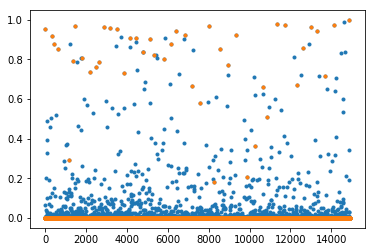

In [35]:
# Plotting MVPs by there probability and non MVPs by prob
ind = []
for i in nind:
    ind.append(i-start)

plt.plot(rprob[:,1],'.')
plt.plot(rprob[:,1]*labels,'.')
plt.show()

In [36]:
# Next, we need to decide what makes a good N for synth data
# Also find first index of each year to determine if actual MVP has higher likelihood than false positives
yearIndex = [0,]
for i in range(len(raw_data)-1):
    if raw_data[i][0] == '':
        yearIndex.append(i)
yearIndex.append(len(raw_data)+1)

data_year = []
year_groups = []
for i in range(len(yearIndex)-1):
    dy = []
    yg = []
    for j in range(len(ndata)):
        player = ndata[j]
        if player[-1] < yearIndex[i+1] and player[-1] > yearIndex[i]:
            dy.append(player)
            yg.append(j)
    data_year.append(dy)
    year_groups.append(yg)

In [37]:
for i in range(len(year_groups)):
    grp = year_groups[i]
    if len(grp) > 1:
        argm = np.argmax(rprob[grp,[1]])
        n = grp[argm]

        mID = int(ndata[n][-1])
        year = raw_data[mID][0]
        name = Stats[mID][2]

        print(year,name)

1974 Kareem Abdul-Jabbar*
1975 Bob McAdoo*
1976 Kareem Abdul-Jabbar*
1977 Kareem Abdul-Jabbar*
1978 Bob McAdoo*
1979 Kareem Abdul-Jabbar*
1980 Kareem Abdul-Jabbar*
1981 Kareem Abdul-Jabbar*
1982 Moses Malone*
1983 Moses Malone*
1984 Larry Bird*
1985 Larry Bird*
1986 Larry Bird*
1987 Magic Johnson*
1988 Larry Bird*
1989 Magic Johnson*
1990 Magic Johnson*
1991 Magic Johnson*
1992 Michael Jordan*
1993 Michael Jordan*
1994 David Robinson*
1995 David Robinson*
1996 Michael Jordan*
1997 Karl Malone*
1998 Karl Malone*
1999 Karl Malone*
2000 Shaquille O'Neal*
2001 Shaquille O'Neal*
2002 Tim Duncan
2003 Tim Duncan
2004 Kevin Garnett
2005 Kevin Garnett
2006 LeBron James
2007 Dirk Nowitzki
2008 LeBron James
2009 LeBron James
2010 LeBron James
2011 LeBron James
2012 LeBron James
2013 LeBron James
2014 Kevin Durant
2015 Stephen Curry
2016 Stephen Curry
2017 Russell Westbrook


In [38]:
# ndata[:,:-1] all real data
# cdata[:,:-1] combined data
# labels list of 1 and 0s with 1=MVP, 0=not MVP
# clabels 
print(ndata[:2])
print(labels[:2])

[[ -1.25000000e-01   3.94736842e-01  -5.00000000e-01   1.34758364e-01
   -8.01886792e-02  -5.00000000e-01  -2.34197731e-01   1.81818182e-02
    2.32193732e-01   1.53429603e-01  -3.45217391e-01  -2.54385965e-01
   -2.87037037e-01  -5.00000000e-01  -2.00367647e-01  -1.85119575e-01
   -1.07142857e-01  -5.00000000e-01  -5.00000000e-01  -5.00000000e-01
   -1.93784278e-01  -1.73774955e-01   6.92995529e-02  -1.14893617e-01
   -2.68307323e-01  -2.53086420e-01   3.04000000e-01  -5.87734242e-02
    9.36363636e-02   9.88103106e-02  -3.57388316e-01  -2.36666667e-01
   -2.71929825e-01  -5.00000000e-01   7.71276596e-02  -2.21246271e-01
   -1.37606032e-01   3.85100000e+03]
 [ -1.66666667e-01   4.21052632e-01  -5.00000000e-01   4.72118959e-01
    3.30188679e-02  -5.00000000e-01  -3.06320908e-01  -1.00000000e-01
    9.82905983e-02   3.79061372e-02  -2.20000000e-01  -2.71929825e-01
   -1.29629630e-01  -5.00000000e-01   3.62132353e-01   2.69707706e-01
    6.09243697e-02  -5.00000000e-01  -5.00000000e-01 

In [162]:
import torch
import torch.nn as nn

In [163]:
n_in, n_h, n_out, batch_size = len(cdata[0])-1, 5, 1, 1000

In [204]:
fit_percentage = 0.75
training_index = np.random.choice(len(cdata),size=int(fit_percentage*len(cdata)),replace=0)

validation_index = [i for i in range(len(cdata)) if i not in training_index]

vx = torch.FloatTensor(cdata[validation_index,:-1])
vy = torch.FloatTensor(np.array(clabels[validation_index]))

x = torch.FloatTensor(cdata[training_index,:-1])
y = torch.FloatTensor(np.array(clabels[training_index]))

In [205]:
model = nn.Sequential(nn.Linear(n_in, n_h),
                     nn.ReLU(),
#                     nn.Linear(n_h, n_h),
#                     nn.ReLU(),
#                     nn.Linear(n_h, n_h),
#                     nn.ReLU(),
                     nn.Linear(n_h, n_out),
                     nn.Sigmoid())

In [206]:
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

In [207]:
epoch = 0
tol = 0.000001
loss_list = []
vloss_list = []
dif = 1
while(dif > tol):
    epoch += 1
    # Forward Propagation
    y_pred = model(x)
    vy_pred = model(vx)
    # Compute and print loss
    loss = torch.nn.functional.binary_cross_entropy(y_pred,y)
    vloss = torch.nn.functional.binary_cross_entropy(vy_pred,vy)
    if epoch%1000 == 0:
        print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    loss_list.append(loss.item())
    vloss_list.append(vloss.item())
    if epoch > 2:
        dif = abs(loss_list[-1] - loss_list[-2])

C:\Users\lrabin\Anaconda3\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([11550])) that is different to the input size (torch.Size([11550, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
C:\Users\lrabin\Anaconda3\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([3850])) that is different to the input size (torch.Size([3850, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


epoch:  1000  loss:  0.08840406686067581
epoch:  2000  loss:  0.06923076510429382
epoch:  3000  loss:  0.058730337768793106
epoch:  4000  loss:  0.05224686488509178
epoch:  5000  loss:  0.04760223254561424
epoch:  6000  loss:  0.04393187165260315
epoch:  7000  loss:  0.04097527265548706
epoch:  8000  loss:  0.03856082633137703
epoch:  9000  loss:  0.03654617816209793
epoch:  10000  loss:  0.03483552485704422
epoch:  11000  loss:  0.03335605189204216
epoch:  12000  loss:  0.032078005373477936


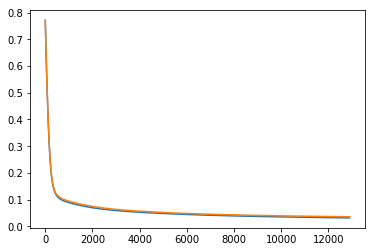

In [208]:
plt.plot(loss_list)
plt.plot(vloss_list)
plt.show()

In [216]:
# Find the "true score" of our logistic regression by finding the player with
# the highest likelihood to be MVP each year
f = torch.FloatTensor(ndata[:,:-1])
f_pred = model(f)

ccorrect = []
counter = 0
for i in range(len(year_groups)):
    grp = year_groups[i]
    if len(grp) > 1:
        counter += 1
        argm = np.argmax(f_pred.detach().numpy()[grp])
        mvp_choice = grp[argm]
        if int(ndata[mvp_choice][-1]) in MVP_index:
            ccorrect.append(i)
ctrue_score = len(ccorrect)/counter
print('True Score:',np.round(ctrue_score,5))

True Score: 0.56818


In [218]:
# Finding what was right and what was wrong
pos = np.where(f_pred>=0.5)[0]
MVP = np.where(labels==1)[0]

correct = np.intersect1d(pos,MVP)
fpos = np.setdiff1d(pos,correct)
fneg = np.setdiff1d(MVP,correct)

print('Correct MVPs: ',len(correct),'/',len(MVP))
print('False Positives: ',len(fpos))

Correct MVPs:  36 / 44
False Positives:  64


In [217]:
nMVP = len(np.where(f_pred.detach().numpy() >= 0.5)[0])
print(nMVP)

100
